### Multiple linear regression(MLR) with Stochastic Gradient Descent(SGD), 
#### on new dataset(StandardScaler on whole dataset, 11 features, useful vote normalization removed)
20220906

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
#import data
train_df = pd.read_parquet("train_main.parquet.snappy")
test_df = pd.read_parquet("test_main.parquet.snappy")
val_df = pd.read_parquet("val_main.parquet.snappy")

In [3]:
X_train = train_df.drop(['r_id','r_useful'],axis=1)
y_train = train_df['r_useful']
X_test = test_df.drop(['r_id','r_useful'],axis=1)
y_test = test_df['r_useful']
X_val = val_df.drop(['r_id','r_useful'],axis=1)
y_val = val_df['r_useful']

# standardise the features
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

#### Linear regression with Stochastic Gradient Descent (sgd)

In [4]:
random.seed(760)
sgd = SGDRegressor(max_iter=1000)
model = sgd.fit(X_train, y_train)

In [12]:
y_pred_train_sgd = sgd.predict(X_train)
y_pred_test_sgd  = sgd.predict(X_test)


mae = mean_absolute_error(y_train, y_pred_train_sgd)
mse = mean_squared_error(y_train, y_pred_train_sgd)
rmse = np.sqrt(mse)
print("On training set: RMSE:", rmse, "MAE", mae)

#Prediction(test) 
mae = mean_absolute_error(y_test, y_pred_test_sgd)
mse = mean_squared_error(y_test, y_pred_test_sgd)
rmse = np.sqrt(mse)
print("On test set: RMSE:", rmse, "MAE", mae)

On training set: RMSE: 4.471520108693297 MAE 1.6596193358208642
On test set: RMSE: 4.050342491027838 MAE 1.6609867359596466


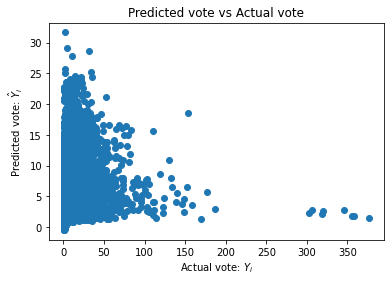

In [8]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test_sgd)
plt.xlabel("Actual vote: $Y_i$")
plt.ylabel("Predicted vote: $\hat{Y}_i$")
plt.title("Predicted vote vs Actual vote")
plt.show()